**Classification with BP || Dataset: ring**

Backpropagation (BP) is a supervised learning algorithm used for training artificial neural networks. It is a widely used optimization algorithm that adjusts the weights of the connections in a neural network in order to minimize the difference between the predicted output and the actual target output.

**Import moudles**

* NumPy (np):

A powerful library for numerical operations in Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.
* Pandas (pd):

A data manipulation library that provides data structures for efficiently storing and manipulating large datasets. It is particularly useful for working with structured data and is often used for data preprocessing and analysis.
* Matplotlib (plt):

A popular 2D plotting library for creating static, animated, and interactive visualizations in Python. It is commonly used for data visualization in various fields.
* Scikit-Learn (sklearn):

A machine learning library that provides simple and efficient tools for data analysis and modeling, including various algorithms, metrics, and tools for model evaluation.
* TensorFlow (tf):

An open-source machine learning framework developed by the Google Brain team. It allows for the creation and training of deep learning models, including neural networks.
* Keras (kr):

A high-level neural networks API that runs on top of TensorFlow (and other frameworks). It provides an easy-to-use interface for building and training neural networks.
* KFold (KFold):

A method from scikit-learn for splitting a dataset into K consecutive folds (subsets). It is often used in cross-validation to assess a model's performance.
* Confusion Matrix and ConfusionMatrixDisplay (confusion_matrix, ConfusionMatrixDisplay):

Tools for evaluating the performance of a classification model. A confusion matrix shows the true positive, true negative, false positive, and false negative values, and ConfusionMatrixDisplay is used to display this information.
* Accuracy Score (accuracy_score):

A metric from scikit-learn for evaluating classification accuracy, which is the ratio of correctly predicted instances to the total instances.
* IPython Display (display, HTML):

Tools for customizing the display of output in Jupyter notebooks. display can be used to control the output of the final cell, and HTML can be used to embed HTML content.

* %matplotlib inline

Is a magic command for Jupyter notebooks that allows Matplotlib plots to be displayed directly in the notebook rather than in a separate window.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import KFold
import tensorflow as tf
import tensorflow.keras as kr
from IPython.core.display import display, HTML
%matplotlib inline

**Upload files**

The files.upload() method allows you to upload files directly to your Colab environment.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving A2-ring-merged.txt to A2-ring-merged.txt
Saving A2-ring-separable.txt to A2-ring-separable.txt
Saving A2-ring-test.txt to A2-ring-test.txt


In [3]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "A2-ring-merged.txt" with length 220021 bytes
User uploaded file "A2-ring-separable.txt" with length 220021 bytes
User uploaded file "A2-ring-test.txt" with length 220003 bytes



**Load Dataset**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading data**


*   Load training/test data.  
Using the numpy.loadtxt function to load data from a file with a tab-separated format ('\t' delimiter) and specifying the data types for the columns.

  * *'names': ('x', 'y', 'C') specifies the names of the fields/columns in the resulting NumPy array.*

  * *'formats': ('f4', 'f4', 'i4') specifies the data types for each field. In this case, 'f4' represents a 32-bit floating-point number, and 'i4' represents a 32-bit integer.*

* Create training/test DataFrame

A DataFrame is a two-dimensional data structure in the Python library called Pandas. Pandas is a powerful and widely used tool for data manipulation and analysis in the Python programming environment. The DataFrame data structure is fundamental to Pandas and can be thought of as a table in an SQL database or an Excel spreadsheet.

In [5]:
# Load training data
filename1 = 'A2-ring-separable.txt'
#filename1 = 'input\\A2-ring\\A2-ring-merged.txt'
ring_separable_data = np.loadtxt(filename1, delimiter='\t', dtype={'names': ('x', 'y', 'C'), 'formats': ('f4', 'f4', 'i4')})

# Create a DataFrame
train_df = pd.DataFrame(ring_separable_data)
print(train_df)

# Load test data
filename2 = 'A2-ring-test.txt'
ring_test_data = np.loadtxt(filename2, delimiter='\t', dtype={'names': ('x', 'y', 'C'), 'formats': ('f4', 'f4', 'i4')})

# Create a DataFrame
test_df = pd.DataFrame(ring_test_data)
print(test_df)

             x         y  C
0    -0.137094  0.899654  0
1     0.542574 -0.492435  1
2    -0.658204  0.605110  0
3    -0.869820  0.519287  0
4     0.678610  0.346579  1
...        ...       ... ..
9995  0.419610 -0.482939  1
9996 -0.456348  0.910800  0
9997 -0.003036 -0.295153  1
9998  0.765332  0.798063  0
9999 -0.532259 -0.302748  1

[10000 rows x 3 columns]
             x         y  C
0     0.512196  0.112623  1
1     0.610173 -0.387091  1
2     0.927970  0.245895  0
3     0.159933  0.111516  0
4    -0.451556  0.877259  0
...        ...       ... ..
9995  0.958078 -0.422827  0
9996  0.544659 -0.590963  0
9997 -0.684583  0.916596  0
9998  0.906773  0.274620  0
9999 -0.544859  0.132948  1

[10000 rows x 3 columns]



**Exploring data**

Using Matplotlib to create a scatter plot with a legend based on the third column of a DataFrame (train_df).

* fig, ax = plt.subplots(): Creates a figure and a set of subplots. ax is the subplot, and fig is the whole figure.

* ax.set_aspect('equal', 'box'): Sets the aspect ratio of the plot to be equal.

* scatter = ax.scatter(train_df.iloc[:, 0], train_df.iloc[:, 1], c=train_df.iloc[:, 2], s=1): Creates a scatter plot using the first two columns of train_df as x and y coordinates, the third column as the color (c), and s=1 sets the marker size to 1.

* legend1 = ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes"): Creates a legend based on the unique colors in the scatter plot. The legend is placed in the lower-left corner with the title "Classes".

* ax.add_artist(legend1): Adds the legend to the plot.

* plt.show(): Displays the plot.

This code seems to be visualizing a 2D scatter plot where points are colored based on the values in the third column of the DataFrame (train_df). The legend represents the classes based on the unique colors used in the scatter plot.

**Training**

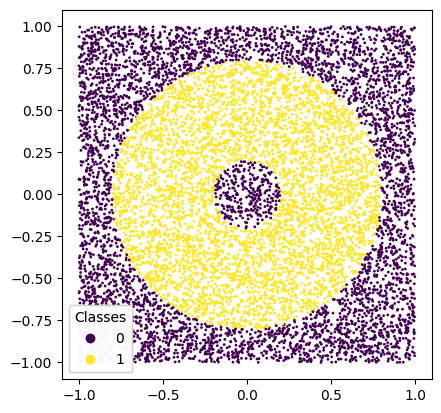

In [6]:
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
scatter = ax.scatter(train_df.iloc[:,0], train_df.iloc[:,1], c=train_df.iloc[:,2], s=1)
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left",
                    title="Classes")
ax.add_artist(legend1)
plt.show()

Test

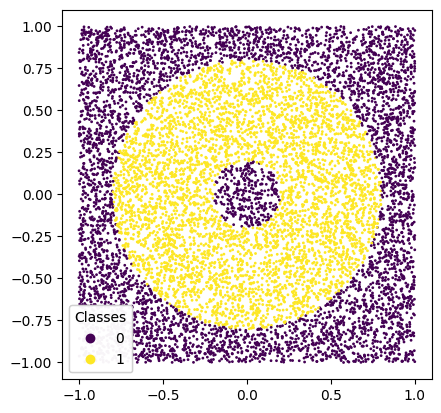

In [7]:
fig, ax2 = plt.subplots()
ax2.set_aspect('equal', 'box')
scatter2 = ax2.scatter(test_df.iloc[:,0], test_df.iloc[:,1], c=test_df.iloc[:,2], s=1)
# produce a legend with the unique colors from the scatter
legend2 = ax2.legend(*scatter2.legend_elements(),
                    loc="lower left",
                    title="Classes")
ax2.add_artist(legend2)
plt.show()

**Training || TensorFlow**

Setting up a grid of coordinates for a prediction map and preparing your training data for a machine learning model.

In [8]:
# Resolution of the Prediction Map: This variable res is set to 100, indicating that you want to create a prediction map with a resolution of 100x100 coordinates.
res = 100

# Coordinates of the Prediction Map: These lines create arrays _x0 and _x1 containing evenly spaced values between -1.0 and 1.0. These will be used as coordinates for the prediction map.
_x0 = np.linspace(-1.0, 1.0, res)
_x1 = np.linspace(-1.0, 1.0, res)

# Input with Each Coordinate Combination: This code creates an input array _pX where each row represents a pair of coordinates from the prediction map.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Empty Prediction Map Initialized to 0.5: This line initializes an empty prediction map _pY with a shape of (res, res) and fills it with 0.5.
_pY = np.zeros((res, res)) + 0.5
# Training Data Preparation: These lines extract the features ('x' and 'y') and the target variable ('C') from your training dataframe (train_df) and convert them to NumPy arrays.
X_train = train_df[['x', 'y']].to_numpy()
y_train = train_df['C'].to_numpy()
# Assigning Variables: Here, X is assigned the feature array, and Y is assigned the target array.
X=X_train
Y=y_train

Implementation a simple neural network using TensorFlow to perform binary classification.

Instructions for updating:
non-resource variables are not supported in the long term


Step 0 / 200000 - Loss =  0.39024144 - Acc = 0.5203
Step 1000 / 200000 - Loss =  0.32717177 - Acc = 0.5211
Step 2000 / 200000 - Loss =  0.28626987 - Acc = 0.5897
Step 3000 / 200000 - Loss =  0.26512507 - Acc = 0.6092
Step 4000 / 200000 - Loss =  0.24799536 - Acc = 0.6303
Step 5000 / 200000 - Loss =  0.23249531 - Acc = 0.6506
Step 6000 / 200000 - Loss =  0.21822493 - Acc = 0.6754
Step 7000 / 200000 - Loss =  0.20480078 - Acc = 0.6962
Step 8000 / 200000 - Loss =  0.19143076 - Acc = 0.7211
Step 9000 / 200000 - Loss =  0.17923525 - Acc = 0.7448
Step 10000 / 200000 - Loss =  0.1704347 - Acc = 0.768
Step 11000 / 200000 - Loss =  0.1643916 - Acc = 0.7825
Step 12000 / 200000 - Loss =  0.16003212 - Acc = 0.7913
Step 13000 / 200000 - Loss =  0.15675695 - Acc = 0.7963
Step 14000 / 200000 - Loss =  0.15416998 - Acc = 0.7995
Step 15000 / 200000 - Loss =  0.15201445 - Acc = 0.8013
Step 16000 / 200000 - Loss =  0.15015756 - Acc = 0.8033
Step 17000 / 200000 - Loss =  0.14850095 - Acc = 0.805
Step 1800

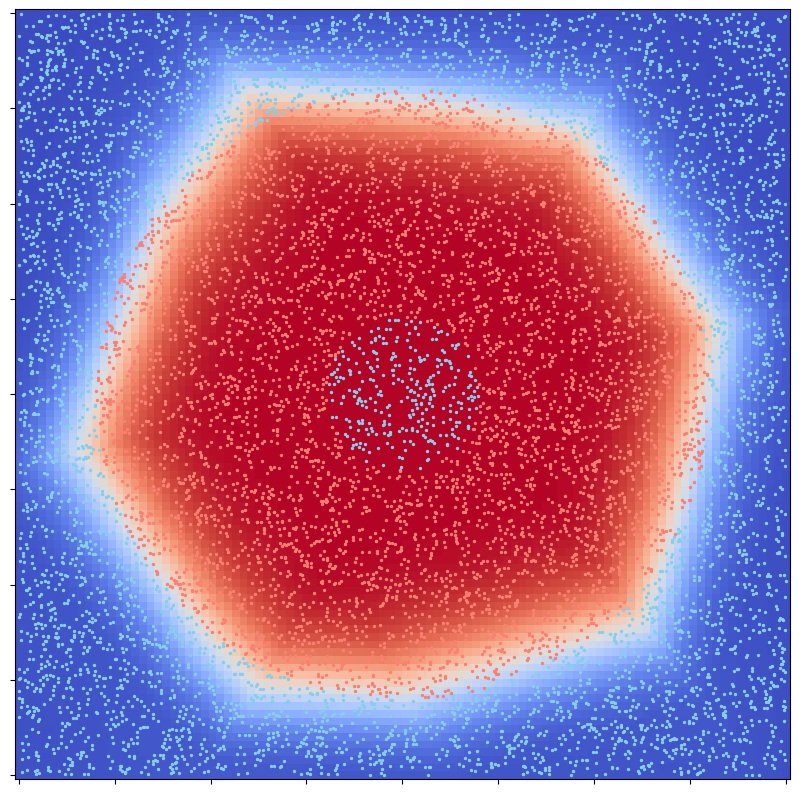

In [9]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from matplotlib import animation
from IPython.core.display import display, HTML

# Placeholder Definitions: These placeholders are used to feed the input features (iX) and target labels (iY) into the network during training.
iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])

lr = 0.0005           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.

# Neural Network Architecture: These lines define the architecture of the
# neural network with three layers and the specified number of neurons in each
# layer. ReLU activation is used for the hidden layers, and sigmoid activation is used for the output layer.

# layer 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')

l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# layer 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')

l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# layer 3
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

# output layer
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]


# Loss Function and Optimization:The mean squared error is used as the loss
#function, and the gradient descent optimizer is employed to minimize this loss.

loss = tf.losses.mean_squared_error(pY, iY)


optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)

n_steps = 200000

iPY = []

# The script enters a training loop where the optimizer is executed, and the
# network parameters are updated iteratively.

with tf.Session() as sess:


  sess.run(tf.global_variables_initializer())


  for step in range(n_steps):


    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={ iX : X, iY : Y })


    if step % 1000 == 0:


      acc = np.mean(np.round(_pY) == Y)


      print('Step', step, '/', n_steps, '- Loss = ', _loss, '- Acc =', acc)


      _pY = sess.run(pY, feed_dict={ iX : _pX }).reshape((res, res))


      iPY.append(_pY)


# The code sets up a Matplotlib figure for creating an animation of the network's training progress.
# animation is created to visualize the evolving prediction map during training.

ims = []

fig = plt.figure(figsize=(10, 10))

print("--- Generando animación ---")

for fr in range(len(iPY)):
  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)


  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue", s=2)
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon", s=2)


  plt.tick_params(labelbottom=False, labelleft=False)

  ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

HTML(ani.to_html5_video())

**Cross validation|| keras**



This code is performing a 4-fold cross-validation on a neural network trained for a binary classification problem. Here's a breakdown of the code:

 * Data Preparation:

X_train = train_df[['x', 'y']].to_numpy()
y_train = train_df['C'].to_numpy()
The features (X_train) and target labels (y_train) are extracted from the training dataset.

* Neural Network Configuration:

learning_rate = 0.05
momentum = 0.1
nn = [2, 16, 8, 1]
Hyperparameters such as the learning rate, momentum, and the number of neurons in each layer of the neural network are defined.

* fold Cross-Validation Loop:

kf = KFold(n_splits=4)
for train, validation in kf.split(X_train):
The code sets up a 4-fold cross-validation using scikit-learn's KFold function.

* Neural Network Training within Cross-Validation:


model = kr.Sequential()

model.compile(loss='mse', optimizer=kr.optimizers.SGD(learning_rate=learning_rate, momentum=momentum), metrics=['acc'])
history = model.fit(X_train[train], y_train[train], epochs=200)
Inside each fold, a neural network is created, compiled, and trained using the training subset of data.

* Loss Visualization:

python
Copy code
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
The loss during training is plotted for each epoch.

* Model Evaluation on Validation Set:

y_pred = model.predict(X_train[validation])
threshold = 0.5
y_pred = np.where(y_pred > threshold, 1, 0)
disp = ConfusionMatrixDisplay.from_predictions(y_train[validation], y_pred, cmap=plt.cm.Blues, normalize='true')
plt.show()
The model predictions are evaluated on the validation set using a confusion matrix and a threshold for binary classification.

* Calculation of Classification Error:

cm = confusion_matrix(y_train[validation], y_pred)
percentage_classification_error = 100 * ((cm[0][1] + cm[1][0]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0]))
cv_percentage_classification_errors.append(percentage_classification_error)
The percentage classification error is calculated and stored for each fold.

* Results Display:

print('\nResults of cross validation:')
print('> Mean percentage classification error obtained from cross-validation:')
print(f'> {np.mean(cv_percentage_classification_errors)}% (+- {np.std(cv_percentage_classification_errors)})')
The mean percentage classification error obtained from cross-validation is printed.

This script provides a comprehensive evaluation of a neural network's performance through cross-validation, including loss visualization and confusion matrix analysis. It's a good practice to assess model performance in a robust manner using cross-validation.

In [ ]:
X_train = train_df[['x', 'y']].to_numpy()
y_train = train_df['C'].to_numpy()

learning_rate = 0.05  # learning rate
momentum = 0.1        # momentum
nn = [2, 16, 8, 1]    # número de neuronas por capa

fold_no = 1

cv_percentage_classification_errors = list()

# 4-fold cross-validation
kf = KFold(n_splits=4)
for train, validation in kf.split(X_train):
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    #print("%s %s" % (train, validation))
    #print('Training set')
    #print(X_train[train])
    #print(y_train[train])
    #print('Validation set')
    #print(X_train[validation])
    #print(y_train[validation])


    model = kr.Sequential()


    l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))


    l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))


    l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))


    model.compile(loss='mse', optimizer=kr.optimizers.SGD(learning_rate=learning_rate, momentum=momentum), metrics=['acc'])


    history = model.fit(X_train[train], y_train[train], epochs=200)

    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()

    # Generate predictions
    y_pred = model.predict(X_train[validation])

    # Use a threshold to select the probabilities that will determine class 0 or 1
    threshold = 0.5
    y_pred = np.where(y_pred > threshold, 1,0)

    # Evaluate by means of a confusion matrix
    disp = ConfusionMatrixDisplay.from_predictions(y_train[validation], y_pred,
                                                    cmap=plt.cm.Blues,
                                                    normalize='true')
    plt.show()

    cm = confusion_matrix(y_train[validation], y_pred)
    print('Confusion matrix:\n', cm)

    # Calculate the percentage classification error obtained from validation test
    percentage_classification_error = 100 * ((cm[0][1] + cm[1][0]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0]))
    print(f'Percentage classification error obtained from validation set: {percentage_classification_error}%')

    cv_percentage_classification_errors.append(percentage_classification_error)

    # Increase fold number
    fold_no = fold_no + 1

print('\nResults of cross validation:')
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Percentage classification error obtained from validation set per fold')
for i in range(0, len(cv_percentage_classification_errors)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - {cv_percentage_classification_errors[i]}%')
print('------------------------------------------------------------------------')
# Calculate the mean percentage classification error obtained from cross-validation
print('Mean percentage classification error obtained from cross validation:')
print(f'> {np.mean(cv_percentage_classification_errors)}% (+- {np.std(cv_percentage_classification_errors)})')
print('------------------------------------------------------------------------')

**raining || Keras**

* Creates a sequential neural network (model) using Keras.
Adds three dense layers to the model:
Layer 1 (l1): Dense layer with 16 neurons and ReLU activation.
Layer 2 (l2): Dense layer with 8 neurons and ReLU activation.
Layer 3 (l3): Dense layer with 1 neuron and sigmoid activation (for binary classification).
* Compiles the model with the mean squared error (MSE) loss function.
Uses the stochastic gradient descent (SGD) optimizer with specified learning rate and momentum.
Metrics include accuracy ('acc') for evaluation.
* Trains the model using the training data (X_train, y_train) for 200 epochs.
The training history (history) contains information about loss and metrics at each epoch.
* Plots the loss during training over epochs to visualize the learning progress.
The x-axis represents the number of epochs, and the y-axis represents the loss.
T
his code constructs a neural network using Keras with three layers, compiles it with specified settings, trains it on the provided data, and visualizes the training loss over epochs. This is a common structure for training and evaluating a simple neural network for a regression or binary classification task.


In [ ]:
learning_rate = 0.05  # learning rate
momentum = 0.1        # momentum
nn = [2, 16, 8, 1]    # número de neuronas por capa.


model = kr.Sequential()


l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))


l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))


l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))


model.compile(loss='mse', optimizer=kr.optimizers.SGD(learning_rate=learning_rate, momentum=momentum), metrics=['acc'])


history = model.fit(X_train, y_train, epochs=200)

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

**Test || Keras**

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


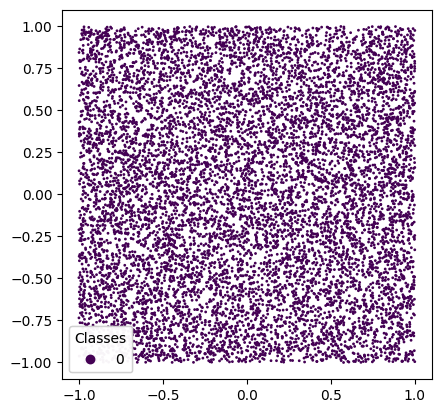

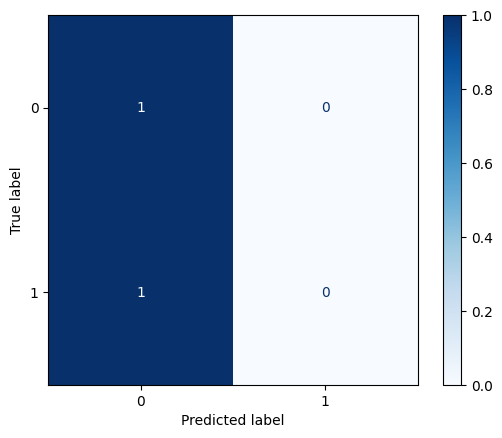

Confusion matrix:
 [[5333    0]
 [4667    0]]
Percentage classification error obtained from test set: 46.67%


In [12]:
X_test = test_df[['x', 'y']].to_numpy()
y_test = test_df['C'].to_numpy()


y_pred = model.predict(X_test)


threshold = 0.5
y_pred = np.where(y_pred > threshold, 1,0)



fig, ax3 = plt.subplots()
ax3.set_aspect('equal', 'box')
scatter3 = ax3.scatter(X_test[:,0], X_test[:,1], c=y_pred[:], s=1)

legend3 = ax3.legend(*scatter3.legend_elements(),
                    loc="lower left",
                    title="Classes")
ax3.add_artist(legend3)
plt.show()



disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
																								cmap=plt.cm.Blues,
																								normalize='true')
plt.show()

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)


percentage_classification_error = 100 * ((cm[0][1] + cm[1][0]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0]))
print(f'Percentage classification error obtained from test set: {percentage_classification_error}%')

True Positives (TP): 4117 instances were correctly classified as positive.

False Positives (FP): 4530 instances were incorrectly classified as positive.

True Negatives (TN): 803 instances were correctly classified as negative.

False Negatives (FN): 550 instances were incorrectly classified as negative.

Percentage Classification Error:
Percentage Classification Error: 50.8%

The confusion matrix provides a detailed breakdown of the model's performance, distinguishing between true positives, false positives, true negatives, and false negatives. The percentage classification error suggests that approximately 50.8% of instances in the test set were misclassified. Further analysis or exploration of other evaluation metrics may be beneficial to gain a comprehensive understanding of the model's strengths and weaknesses.

In [13]:
y_pred = np.concatenate(y_pred, axis=0)

ring_bp_results = { 'real_value': y_test,
                    'prediction': y_pred}

df = pd.DataFrame(ring_bp_results)

df.to_csv('ring_bp_results.csv')

In [14]:
weights = model.get_weights()
np.savetxt('ring_bp_model_weights.csv', weights, fmt='%s', delimiter=',')

/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py:1533: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.asarray(X)


In [15]:
# serialize model to JSON
model_json = model.to_json()
with open("ring_bp_model.json", "w") as json_file:
    json_file.write(model_json)